Di Notebook ini kami melakukan beberapa modifikasi yaitu :
1. Mengganti dataset
2. EDA -> dikarenakan fitur yang ada pada dataset ini berbeda dengan dataset dari file notebook dari LMS sehingga perlu dilakukan penyesuaian
3. Penambahan visualisasi untuk result dari association rules

Referensi yang digunakan : notebook MBA dari LMS, notebook latihan MBA oleh coach Hassan, Groceries Analysis dari Kaggle

import module/lib yang akan digunakan untuk exploration dan processing dataset 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

##### Import dan Read Dataset

Dataset yang digunakan adalah dataset Groceries yang bersumber dari Kaggle
https://www.kaggle.com/datasets/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba?select=Groceries+data.csv

In [76]:
df = pd.read_csv('/home/yogasugitha/kaggle/src/data/Groceries_data.csv')
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


#### Exploration Data

In [77]:
df.shape

(38765, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


dari informasi di atas dapat disimpulkan bahwa tidak data dengan value null dan tipe data yang tersedi adalah int & object. Selain itu, untuk column Date tidak perlu dilakukan split karena sudah ada column year, month, day untuk dilakukan visualisasi data

In [79]:
df.isnull().sum() #tidak ada null value

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [80]:
df.year.unique() #terlihat bahwa dataset merupakan record transaction dari tahun 2014 - 2015

array([2015, 2014])

In [81]:
df.groupby(['year','month']).count()

Member_number  Date  itemDescription   day  day_of_week
year month                                                         
2014 1               1504  1504             1504  1504         1504
     2               1547  1547             1547  1547         1547
     3               1491  1491             1491  1491         1491
     4               1506  1506             1506  1506         1506
     5               1625  1625             1625  1625         1625
     6               1525  1525             1525  1525         1525
     7               1623  1623             1623  1623         1623
     8               1535  1535             1535  1535         1535
     9               1350  1350             1350  1350         1350
     10              1555  1555             1555  1555         1555
     11              1496  1496             1496  1496         1496
     12              1520  1520             1520  1520         1520
2015 1               1829  1829             1829  1829         1829
     2               1485  1485             1485  1485         1485
     3               1792  1792             1792  1792         1792
     4               1666  1666             1666  1666         1666
     5               1710  1710             1710  1710         1710
     6               1791  1791             1791  1791         1791
     7               1645  1645             1645  1645         1645
     8               1963  1963             1963  1963         1963
     9               1613  1613             1613  1613         1613
     10              1663  1663             1663  1663         1663
     11              1777  1777             1777  1777         1777
     12              1554  1554             1554  1554         1554

bisa dilihat dari output diatas, bahwa untuk setiap bulannya item terjual diatas 1k+

In [82]:
freq_items = df['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

#### Data Visualization

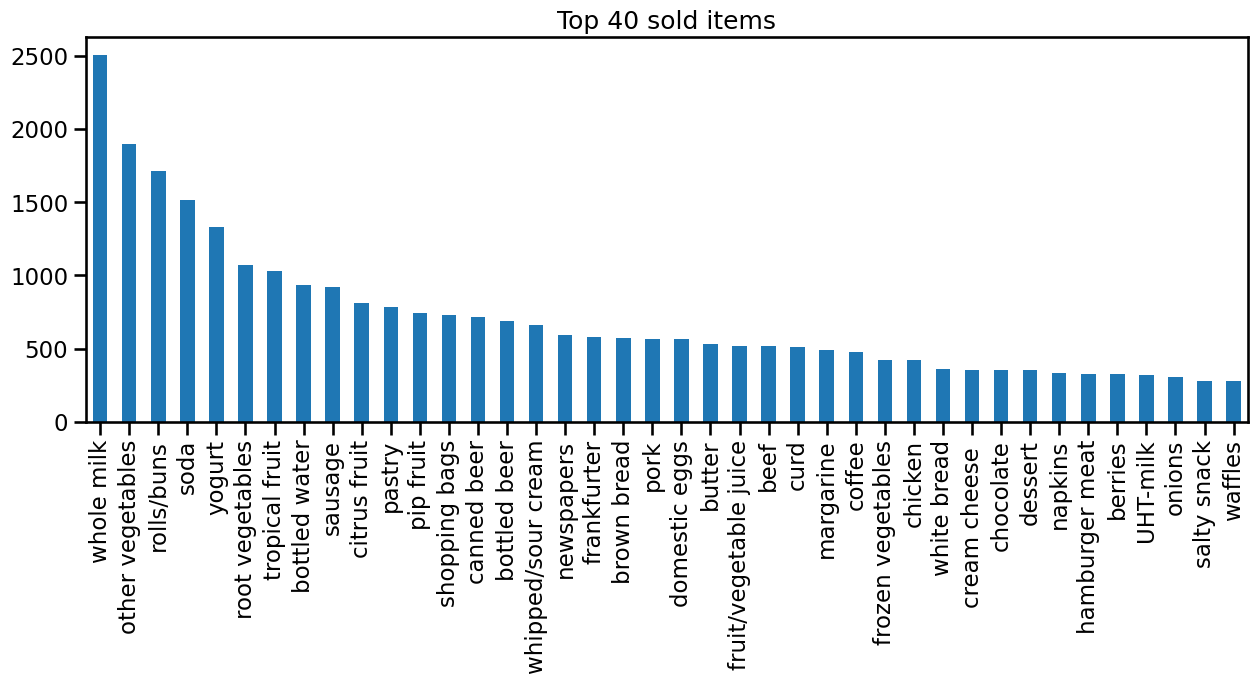

In [83]:
plt.figure(figsize=(15,5))
freq_items[:40].plot(kind='bar')
plt.title('Top 40 sold items')
plt.show()

#### Transactional Encoder

Sebelum melakukan encoding dataset, akan dibuat list dari item berdasarkan member_number, ini dilakukan untuk menggabungkan item menjadi array apabila terdapat member_number yang sama.

In [84]:
user_id = df['Member_number'].unique()
items = [list(df.loc[df['Member_number'] == id, 'itemDescription']) for id in user_id]
print(items[0])

['tropical fruit', 'long life bakery product', 'meat', 'sugar', 'rolls/buns', 'semi-finished bread', 'whole milk', 'citrus fruit', 'candy', 'napkins']


In [85]:
te = TransactionEncoder() #Membuat instance untuk encoder
item_encoded = te.fit_transform(items) #fit_transform list item berdasarkan member_number
item_matrix = pd.DataFrame(item_encoded, columns = te.columns_)
item_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


#### Processing menggunakan apriori dan association rules

processing menggunakan apriori untuk mendapatkan nilai support dengan parameter **min_support = 0.01** -> result yang ditampilkan adalah itemsets dengans support >0.01

In [86]:
freq_items = apriori(item_matrix, min_support=0.01, use_colnames=True)
freq_items.sort_values(by='support', ascending=False).reset_index(drop=True)

,support,itemsets
0,0.458184,(whole milk)
1,0.376603,(other vegetables)
2,0.349666,(rolls/buns)
3,0.313494,(soda)
4,0.282966,(yogurt)
...,...,...
3011,0.010005,"(sausage, whole milk, ice cream)"
3012,0.010005,"(rolls/buns, other vegetables, ice cream)"
3013,0.010005,"(whole milk, other vegetables, herbs)"
3014,0.010005,"(pork, misc. beverages)"


result dari apriori didapatkan 3016 itemsets untuk min_support = 0.01

In [87]:
rules = association_rules(freq_items, min_threshold=0.2).sort_values(by='lift', ascending=False)
rules.reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(sausage, whole milk, other vegetables)","(yogurt, rolls/buns)",0.050282,0.111339,0.013597,0.270408,2.428689,0.007998,1.218025
1,"(yogurt, other vegetables, rolls/buns)","(sausage, whole milk)",0.052335,0.106978,0.013597,0.259804,2.428575,0.007998,1.206467
2,"(yogurt, curd)","(sausage, whole milk)",0.040277,0.106978,0.010005,0.248408,2.322046,0.005696,1.188173
3,"(sausage, rolls/buns, whole milk)","(yogurt, other vegetables)",0.048743,0.120318,0.013597,0.278947,2.318415,0.007732,1.219997
4,"(yogurt, whole milk, rolls/buns)","(sausage, other vegetables)",0.065931,0.092868,0.013597,0.206226,2.220629,0.007474,1.142808
...,...,...,...,...,...,...,...,...,...
5839,"(long life bakery product, other vegetables)",(whole milk),0.026424,0.458184,0.011031,0.417476,0.911154,-0.001076,0.930118
5840,(packaged fruit/vegetables),(other vegetables),0.031811,0.376603,0.010775,0.338710,0.899380,-0.001205,0.942697
5841,(herbs),(rolls/buns),0.039251,0.349666,0.012314,0.313725,0.897213,-0.001411,0.947629
5842,(herbs),(soda),0.039251,0.313494,0.011031,0.281046,0.896495,-0.001274,0.954867


Setelah processing menggunakan association rules dengan min_threshold = 0.2 didapatkan 5844 rows

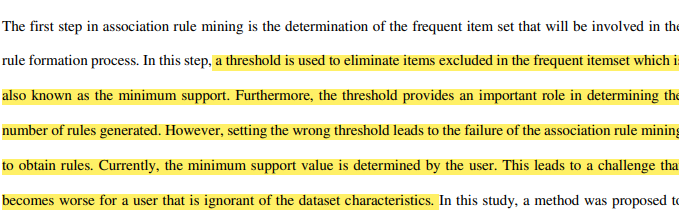

Visualisasi result dari association rule (Antecedent & Consequent support, list, dan confidence)

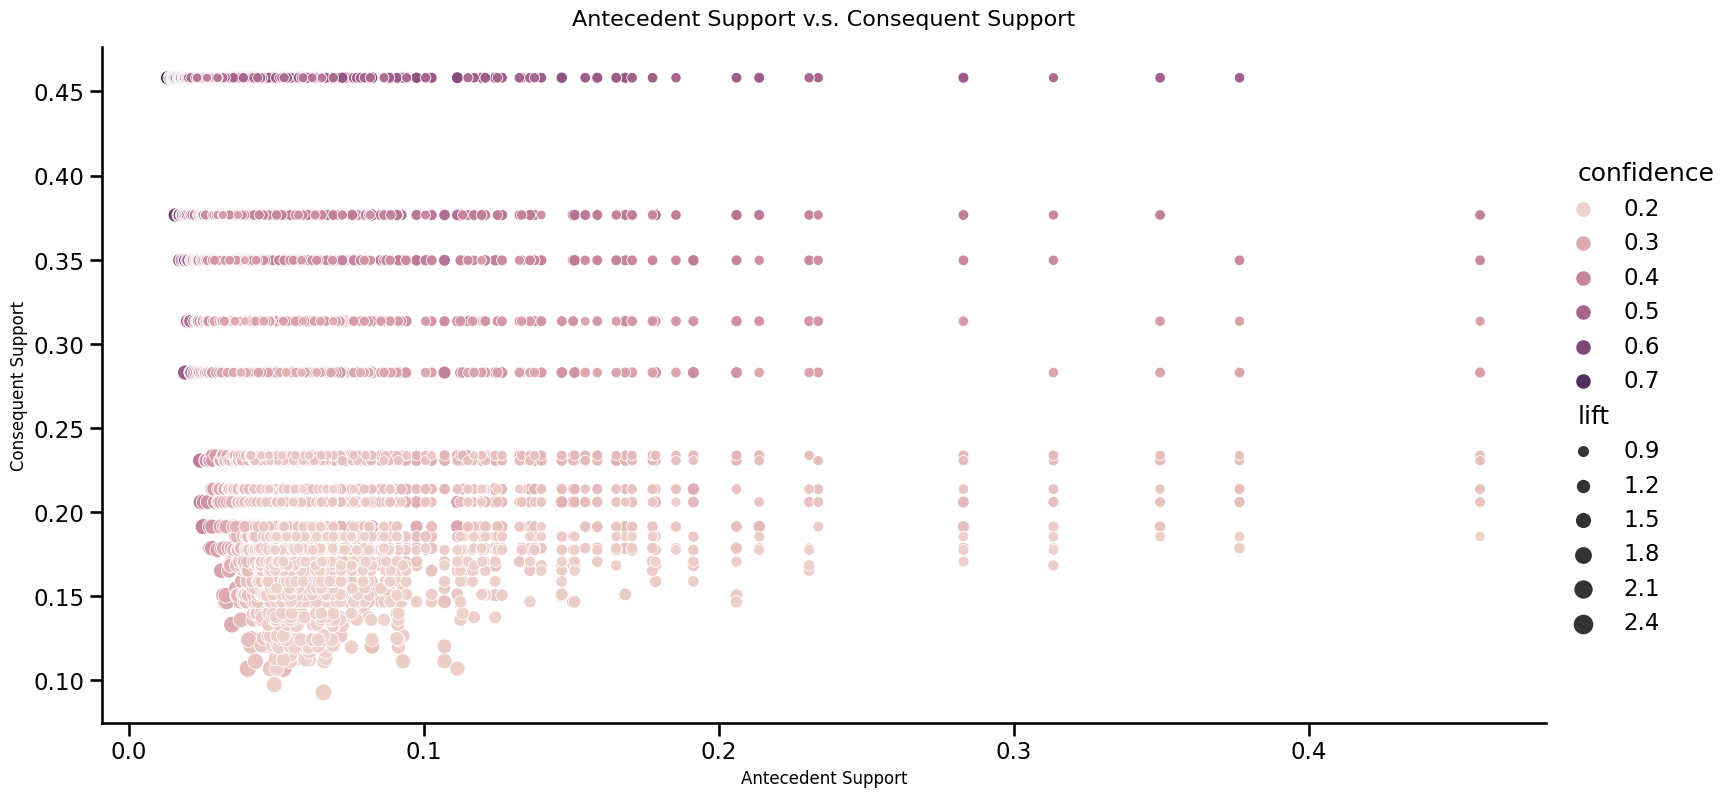

In [88]:
sns.set_context('talk')
sns.relplot(
    data=rules, 
    x='antecedent support',
    y='consequent support',
    size='lift',
    hue='confidence',
    height=8,
    aspect=2,
)
plt.title('Antecedent Support v.s. Consequent Support', fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

dari visualisasi diatas terlihat bahwa mayoritas support dari Antecedent -> Consequent berada dibawah 0.3

***Kesimpulan***

1. 0.458184	(whole milk), 0.376603(other vegetables), 0.349666(rolls/buns), 0.313494(soda), 0.282966(yogurt) adalah top 5 itemset dengan support tertinggi.

2. 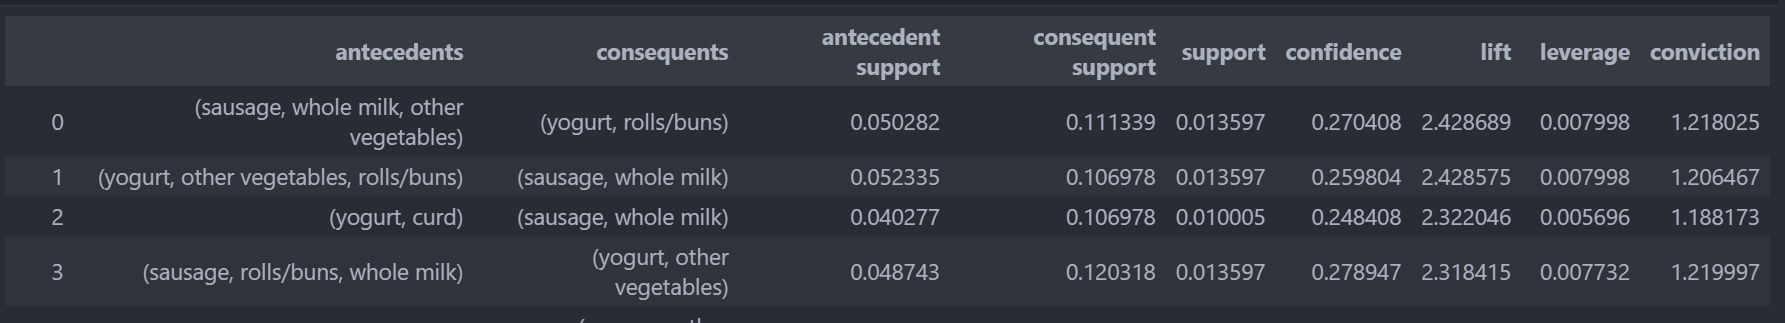
Dari result rule diatas, e.g. : untuk itemset ***Antecedent (sausage, whole milk, other vegetables)*** dan ***Consequent (yogurt, rolls/buns)*** diperoleh 
   - *support = 0.013597* yang artinya terdapat sekitar 1% dari seluruh transaksi memuat itemset Antecedent dan Consequent, 
   - *confidence = 0.270408* yang artinya seorang konsumen yang membeli itemsets dari Antecedent memiliki probabilitas 27% untuk membeli itemset dari Consequent, dan 
   - *lift = 2.428689* yang artinya korelasi antara Antecedent dan Consequent bernilai positif dimana keduanya akan sering muncul bersamaan jika mereka saling bebas secara statistika.
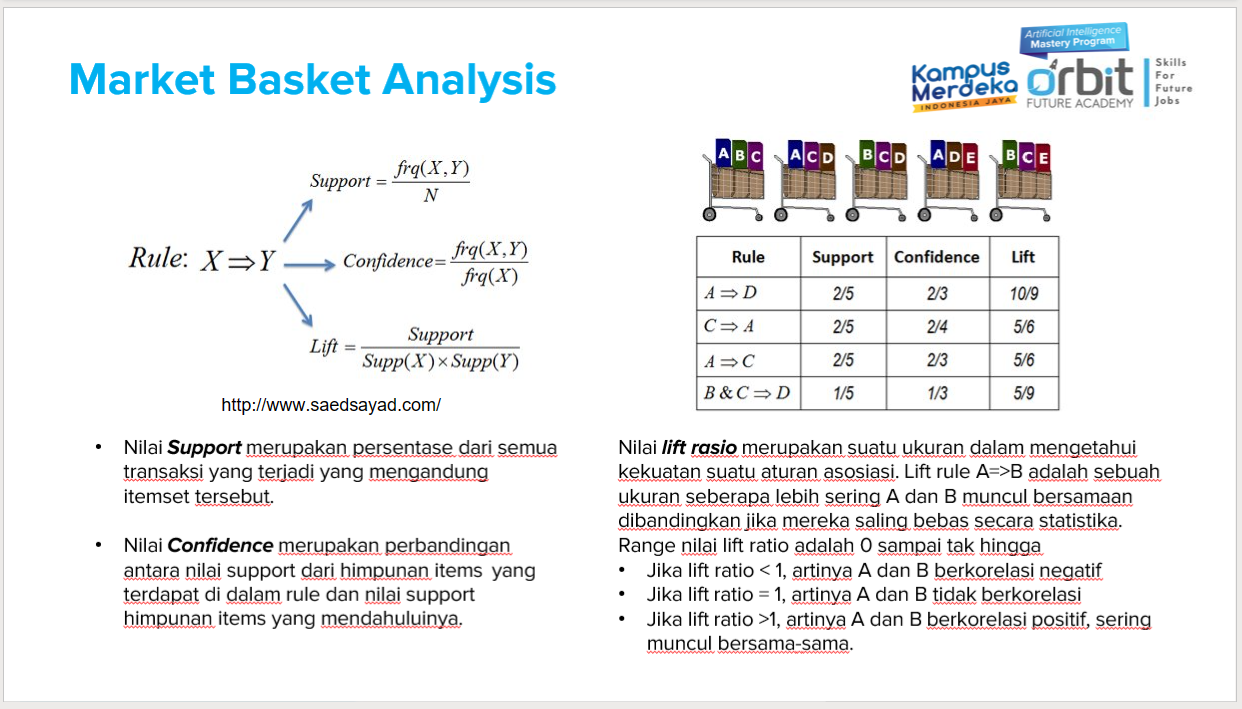

**THANK YOU!**